In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
len(X_train),len(X_test)

(60000, 10000)

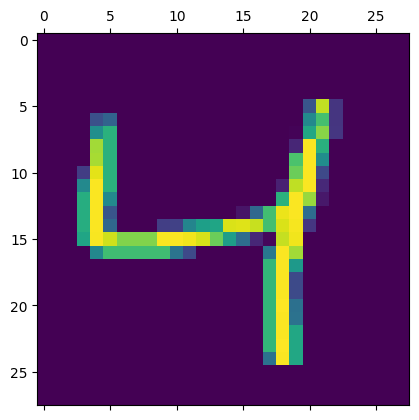

In [8]:
plt.matshow(X_train[2])

In [9]:
y_train[2]

4

In [23]:
X_train=X_train/255
X_test=X_test/255

In [24]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

In [25]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4655 - accuracy: 0.8796
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9152
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2828 - accuracy: 0.9212
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2728 - accuracy: 0.9232
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9261
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2619 - accuracy: 0.9271
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2581 - accuracy: 0.9287
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2552 - accuracy: 0.9291
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2529 - accuracy: 0.9307
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 868us/step - loss: 0.2838 - accuracy: 0.9277


[0.28375688195228577, 0.9276999831199646]

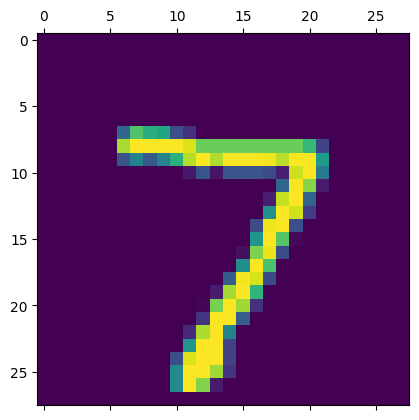

In [29]:
plt.matshow(X_test[0])

In [32]:
y_pred=model.predict(X_test_flattened)

313/313 [==============================] - 0s 711us/step


In [36]:
y_pred[0]

array([7.5983684e-07, 1.5467012e-12, 1.6926546e-05, 9.5404953e-01,
       2.4396005e-04, 6.4886570e-02, 2.6693917e-13, 9.9990183e-01,
       3.5080433e-02, 4.9940148e-01], dtype=float32)

In [40]:
np.argmax(y_pred[1])

2

In [43]:
y_pred_label=[np.argmax(i) for i in y_pred]

In [48]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    0,    2,    1,    5,   10,    3,    1,    0],
       [   0, 1119,    3,    1,    0,    1,    4,    2,    5,    0],
       [   7,   10,  923,   20,   10,    3,   12,   12,   32,    3],
       [   3,    0,   16,  930,    2,   19,    2,   11,   20,    7],
       [   1,    4,    5,    2,  916,    0,   11,    9,    7,   27],
       [   9,    4,    1,   40,   10,  766,   17,    9,   32,    4],
       [   8,    3,    7,    1,    5,   11,  920,    1,    2,    0],
       [   1,    8,   20,    3,    4,    1,    0,  966,    1,   24],
       [   6,   14,    7,   22,    8,   21,   11,   12,  862,   11],
       [   9,    8,    0,   11,   20,    6,    0,   32,    6,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

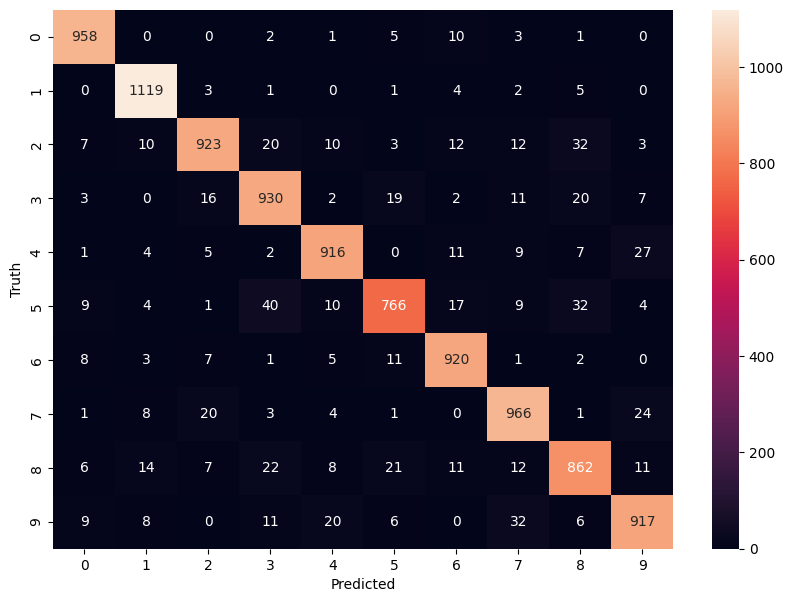

In [49]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
model_1=keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_1.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2019 - accuracy: 0.9399
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0806 - accuracy: 0.9749
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0527 - accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0380 - accuracy: 0.9875
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0273 - accuracy: 0.9911


In [53]:
model_1.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0682 - accuracy: 0.9799


[0.06824545562267303, 0.9799000024795532]

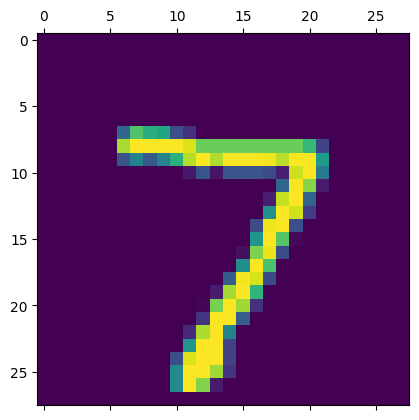

In [54]:
plt.matshow(X_test[0])

In [55]:
y_pred=model_1.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [56]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    0,    2,    1,    5,   10,    3,    1,    0],
       [   0, 1119,    3,    1,    0,    1,    4,    2,    5,    0],
       [   7,   10,  923,   20,   10,    3,   12,   12,   32,    3],
       [   3,    0,   16,  930,    2,   19,    2,   11,   20,    7],
       [   1,    4,    5,    2,  916,    0,   11,    9,    7,   27],
       [   9,    4,    1,   40,   10,  766,   17,    9,   32,    4],
       [   8,    3,    7,    1,    5,   11,  920,    1,    2,    0],
       [   1,    8,   20,    3,    4,    1,    0,  966,    1,   24],
       [   6,   14,    7,   22,    8,   21,   11,   12,  862,   11],
       [   9,    8,    0,   11,   20,    6,    0,   32,    6,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

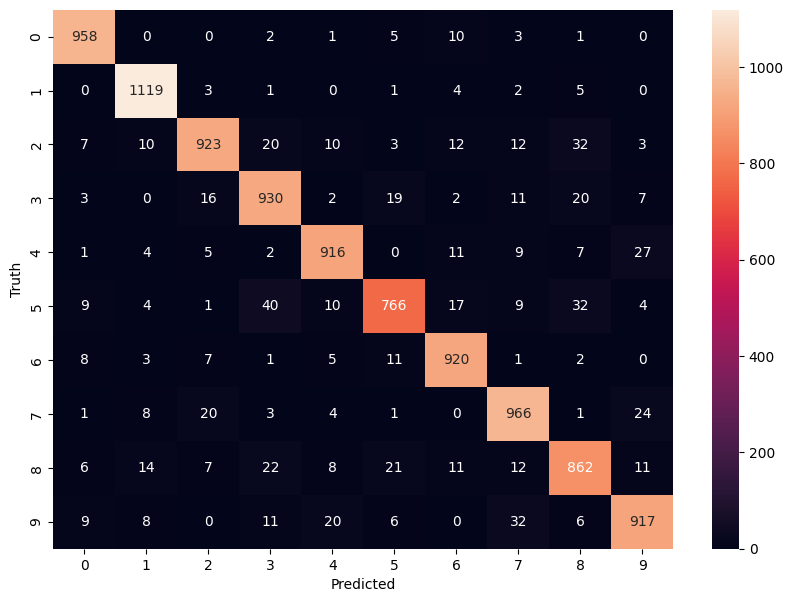

In [57]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4727 - accuracy: 0.8759
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3045 - accuracy: 0.9154
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9209
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9258
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9269
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2581 - accuracy: 0.9281
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2557 - accuracy: 0.9295
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9298
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251